In [23]:
import numpy as np
import arepo
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from tqdm import tqdm
import matplotlib as mpl
from scipy.stats import binned_statistic_2d
from numba import njit

In [2]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/'

In [40]:
sn = {}
sn_iso = {}
num_list = [0, 50, 100, 150, 200, 250, 300, 800]
for num in num_list:
    try:
        sn[num] = arepo.Snapshot(basepath + 'runs/MW3_MHG0.25_GSE2_MHG0.18/lvl4/output', 
                             num, combineFiles=True)
    except:
        pass
    
    try:
        sn_iso[num] = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.7_MHG0.25_RC9/lvl4/output', num,
                    combineFiles=True)
    except:
        pass

In [24]:
@njit
def rodrigues_formula(k, v, theta):
    N = v.shape[0]
    v_rot = np.zeros(np.shape(v))
    
    ctheta = np.cos(theta)
    stheta = np.sin(theta)
    
    for i in range(N):
        v_rot[i] = v[i] * ctheta + np.cross(k, v[i]) * stheta + k * (np.dot(k, v[i])) * (1-ctheta)
    
    return v_rot

In [9]:
name = 'MW3_MHG0.25_GSE2_MHG0.18-lvl4'
COM_fpath = basepath + 'anlys/COM/COM_' + name + '.npy'
COM_file = np.load(COM_fpath, allow_pickle=True).item()

In [38]:
print(COM_file['MW_AngMom'][800])

[-108.51697317 -116.4802268   287.72290552]


In [113]:
pos = sn[800].part2.pos.value - COM_file['MW_COM'][800]
vel = sn[800].part2.vel.value - COM_file['MW_COMV'][800]
r = np.linalg.norm(pos, axis=1)
key = r < 8

print(COM_file['MW_COMV'][800])

ang_mom = sn[800].MassTable[2] * np.sum(np.cross(pos[key], vel[key]), axis=0)
print(ang_mom/np.linalg.norm(ang_mom))
print(COM_file['MW_AngMom'][800]/np.linalg.norm(COM_file['MW_AngMom'][800]))

[ 32.82358   11.369186 -20.917822]
[-0.35960671 -0.3986607   0.84365435]
[-0.33001106 -0.35422811  0.87499437]


In [125]:
snap = 800
pos = sn[snap].part2.pos.value - COM_file['MW_COM'][snap]
vel = sn[snap].part2.vel.value - COM_file['MW_COMV'][snap]

# ang_mom = COM_file['MW_AngMom'][snap]

angmom_dir = ang_mom/np.linalg.norm(ang_mom)
print(np.linalg.norm(angmom_dir))
theta = np.arccos(np.dot(angmom_dir, np.array([0, 0, 1])))
print(theta)
print(angmom_dir)
print(COM_file['MW_AngMom'][snap])
k = np.cross(ang_mom, np.array([0, 0, 1.]))
k /= np.linalg.norm(k)

pos_rot = rodrigues_formula(k, pos, theta)
vel_rot = rodrigues_formula(k, vel.astype(np.float64), theta)

print(theta, sn[snap].MassTable[2]*np.sum(np.cross(pos_rot[key], vel_rot[key]), axis=0))

0.9999999999999999
0.5667425121057668
[-0.35960671 -0.3986607   0.84365435]
[-108.51697317 -116.4802268   287.72290552]
0.5667425121057668 [7.26592564e-14 1.42000598e-12 1.92832365e+02]


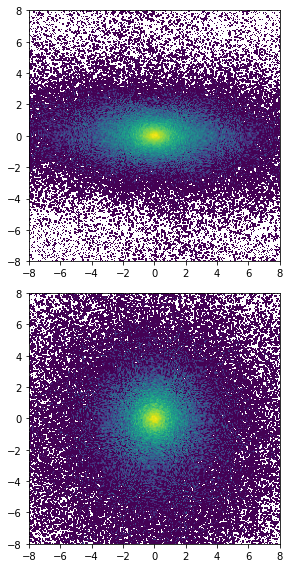

In [126]:
nres = 256
range_xy = [[-8,8], [-8, 8]]
range_xz = [[-8,8], [-8, 8]]

x = pos_rot[:,0]
y = pos_rot[:,1]
z = pos_rot[:,2]


# x = pos[:,0]
# y = pos[:,1]
# z = pos[:,2]

H,   _, _ = np.histogram2d(y, x, bins=(nres, nres), range=range_xy)
Hxz, _, _ = np.histogram2d(y, z, bins=(nres, nres), range=range_xz)

extent_xy = [range_xy[0][0], range_xy[0][1], range_xy[1][0], range_xy[1][1]]
extent_xz = [range_xz[0][0], range_xz[0][1], range_xz[1][0], range_xz[1][1]]

fig, ax = plt.subplots(2, 1, figsize=(4, 8))

ax[0].imshow(Hxz.T, extent=extent_xz, origin='lower', norm=mpl.colors.LogNorm())
# ax[0].scatter(x_center, z_center, c='r', s=1)
ax[0].set_aspect('equal')

ax[1].imshow(H.T, extent=extent_xy, origin='lower', norm=mpl.colors.LogNorm())
# ax[1].scatter(x_center, y_center, c='r', s=1)
ax[1].set_aspect('equal')

fig.tight_layout()
plt.show()

### np.sum(np.cross(pos_rot[key], vel_rot[key]), axis=0)

In [67]:
pos = sn[800].part2.pos.value - COM_file['MW_COM'][800]
vel = sn[800].part2.vel.value# - COM_file['MW_COMV'][800]
r = np.linalg.norm(pos, axis=1)
key = r < 8

ang_mom = sn[800].MassTable[2] * np.sum(np.cross(pos[key], vel[key]), axis=0)
print(ang_mom)
print(COM_file['MW_AngMom'][800])

[-69.4140425  -80.05875994 160.84306306]
[-108.51697317 -116.4802268   287.72290552]
